# Decision Tree Classifier on the cleaned Credit Score dataset

Imports

In [25]:
import pickle
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Loading Dataset

In [26]:
x_train = pd.read_csv("../Dataset//x_train.csv")
y_train = pd.read_csv("../Dataset//y_train.csv")

x_test = pd.read_csv("../Dataset//x_test.csv")
y_test = pd.read_csv("../Dataset//y_test.csv")



Fitting Model

In [27]:
clf = DecisionTreeClassifier(criterion='entropy',max_features=39)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=39)

Performance Metrics

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       353
           1       0.44      0.50      0.47       169
           2       0.79      0.78      0.78       884

    accuracy                           0.70      1406
   macro avg       0.62      0.63      0.62      1406
weighted avg       0.71      0.70      0.70      1406


Accuracy: 0.7034139402560455
Precision: 0.6212337102334478
Recall: 0.6283159742935678
F1: 0.6283159742935678


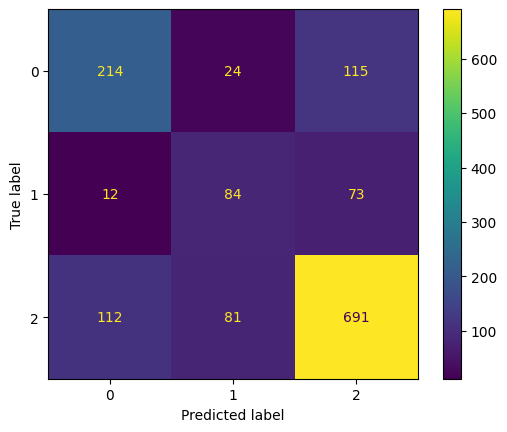

In [28]:
y_pred = clf.predict(x_test)

# y_val = clf.predict(x_train)
# print(classification_report(y_train, y_val))

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")


print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", recall)


cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()


Importing Model as pickle

In [29]:
pickle.dump(clf, open('../Models//decision_tree.pkl', 'wb'))


Tree

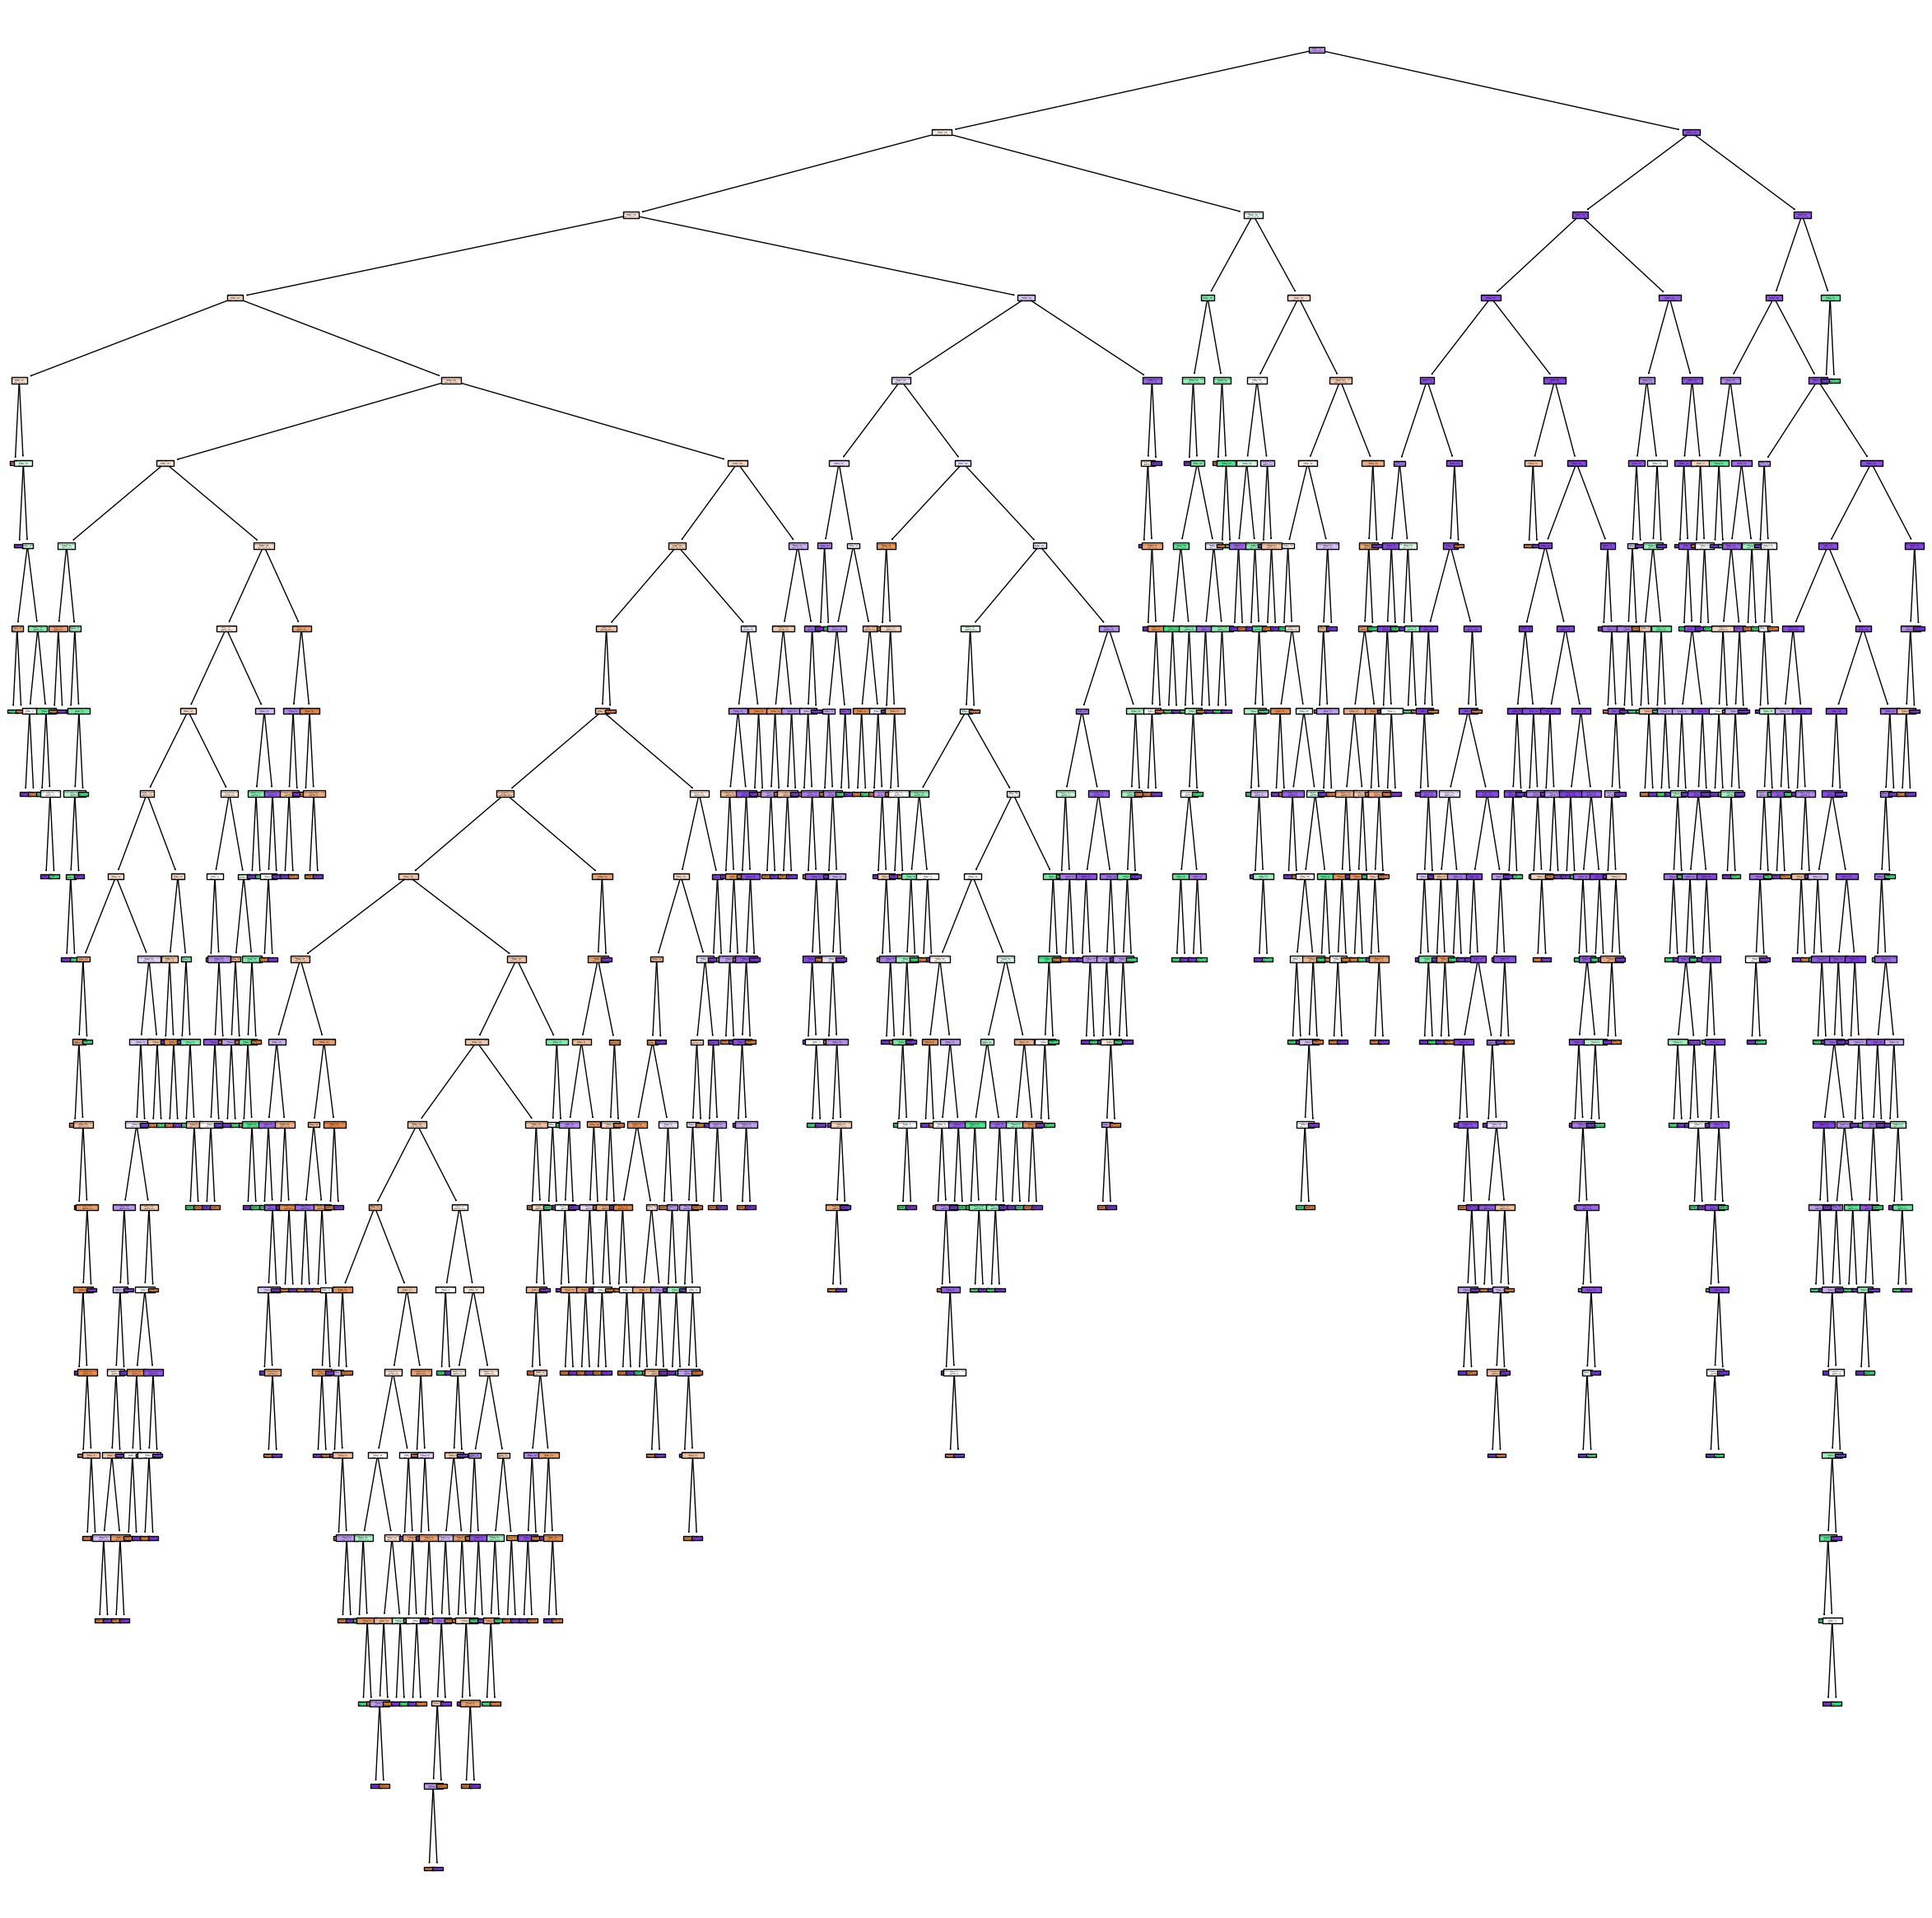

In [30]:
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(clf, feature_names=x_train.columns.values,filled=True)